In [22]:
import datetime as dt
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.mode.copy_on_write=True

# 2023

- Primero cargamos el dataset de acccidentalidad de Madrid del año 2023:

In [23]:
df_2023 = pd.read_csv(
    "./data/2023_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)

Ahora tambien quiero ver sus dimensiones, es decir cuantas filas y columnas tiene el Dataset

In [24]:
df_2023.shape

(48830, 19)

- Aquí observamos que tiene 19 columnas igual que 2025 y 2024, y tiene 48830 filas

Ahora para el formato real de los datos y detectar valores a simple vista

In [25]:
df_2023

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S000001,01/01/2023,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,443397.0,4478129.0,N,NaN
1,2023S000001,01/01/2023,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,443397.0,4478129.0,N,NaN
2,2023S000001,01/01/2023,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,443397.0,4478129.0,N,NaN
3,2023S000001,01/01/2023,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,443397.0,4478129.0,N,NaN
4,2023S000001,01/01/2023,1:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 55 a 59 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,443397.0,4478129.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48825,2023S040267,31/12/2023,21:15:00,AVDA. GRAN VIA DE VILLAVERDE / AVDA. ANDALUCIA,10,17.0,VILLAVERDE,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 45 a 49 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,441152.0,4466350.0,N,NaN
48826,2023S040267,31/12/2023,21:15:00,AVDA. GRAN VIA DE VILLAVERDE / AVDA. ANDALUCIA,10,17.0,VILLAVERDE,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 6 a 9 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,441152.0,4466350.0,N,NaN
48827,2023S040277,29/12/2023,9:35:00,"PTA. TOLEDO, 0",0,1.0,CENTRO,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 45 a 49 años,Hombre,NaN,NaN,439594.0,4473163.0,N,NaN
48828,2023S040277,29/12/2023,9:35:00,"PTA. TOLEDO, 0",0,1.0,CENTRO,Alcance,Despejado,Turismo,Conductor,De 21 a 24 años,Hombre,NaN,NaN,439594.0,4473163.0,N,NaN


In [26]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48830 entries, 0 to 48829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        48830 non-null  object 
 1   fecha                 48830 non-null  object 
 2   hora                  48830 non-null  object 
 3   localizacion          48830 non-null  object 
 4   numero                48827 non-null  object 
 5   cod_distrito          48827 non-null  float64
 6   distrito              48827 non-null  object 
 7   tipo_accidente        48830 non-null  object 
 8   estado_meteorológico  43127 non-null  object 
 9   tipo_vehiculo         48452 non-null  object 
 10  tipo_persona          48830 non-null  object 
 11  rango_edad            48830 non-null  object 
 12  sexo                  48830 non-null  object 
 13  cod_lesividad         25945 non-null  float64
 14  lesividad             25945 non-null  object 
 15  coordenada_x_utm   

Aquí procedemos a hacer una copia del dataset para dejar el original tal cual y poder ver diferencias a la hora de limpiar y demás.

In [27]:
df_2023_copy = df_2023.copy()

Vamos a generar una tabla para ver los nulos y la cardinalidad de las diferentes variables que nos ayudaran a tomar decisiones con cada variable.

In [28]:
# Número de nulos 
nulos = df_2023.isna().sum() 

# Porcentaje de nulos 
nulos_pct = (nulos / len(df_2023) * 100).round(2) 

# Cardinalidad 
card = df_2023.nunique() 

# Porcentaje de cardinalidad 
card_pct = (card / len(df_2023) * 100).round(2) 

# Tipo de dato 
tipos = df_2023.dtypes 

#Construcción de la tabla 
tabla_eda = pd.DataFrame({ 
    "nulos": nulos,
    "% nulos": nulos_pct,
    "cardinalidad": card, 
    "% cardinalidad": card_pct,
    "tipo": tipos }) 

# Ordenar por cardinalidad (o por nulos si prefieres) 
tabla_eda = tabla_eda.sort_values("cardinalidad", ascending=False) 
tabla_eda

,nulos,% nulos,cardinalidad,% cardinalidad,tipo
num_expediente,0,0.00,20672,42.33,object
localizacion,0,0.00,15924,32.61,object
coordenada_y_utm,9,0.02,11071,22.67,float64
coordenada_x_utm,9,0.02,10170,20.83,float64
numero,3,0.01,1717,3.52,object
hora,0,0.00,1250,2.56,object
fecha,0,0.00,365,0.75,object
tipo_vehiculo,378,0.77,34,0.07,object
cod_distrito,3,0.01,21,0.04,float64
distrito,3,0.01,21,0.04,object


In [29]:
df_2023["fecha"] = pd.to_datetime(df_2023["fecha"], errors="coerce", dayfirst=True) 
df_2023["hora"] = pd.to_datetime(df_2023["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_2023["fecha_hora"] = df_2023.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_2023[col] = df_2023[col].astype("string").str.lower().str.strip().str.replace(r"\s+", " ", regex=True)

- Ahora vamos a tratar los nulos 

In [30]:
# 1. ESTADO METEOROLÓGICO
df_2023['estado_meteorológico'] = df_2023['estado_meteorológico'].fillna('No consta')

# 2. TIPO VEHÍCULO 
mask_no_aplica = df_2023['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 

# Peatón y testigo → No aplica 
df_2023.loc[ mask_no_aplica & df_2023['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica'

# El resto de nulos → No consta 
df_2023['tipo_vehiculo'] = df_2023['tipo_vehiculo'].fillna('No consta') 

# 3. LESIVIDAD (ORDINAL) 
df_2023['cod_lesividad'] = df_2023['cod_lesividad'].fillna(14) 
df_2023['lesividad'] = df_2023['lesividad'].fillna('Sin asistencia sanitaria')

# 4. ALCOHOL
df_2023['positiva_alcohol'] = df_2023['positiva_alcohol'].fillna('No consta') 

# 5. NUMERO 
df_2023['numero'] = df_2023['numero'].fillna('No aplica')

# 6. DROGAS
# Eliminamos la columna por la gran cantidad de nulos
df_2023 = df_2023.drop(columns = ["positiva_droga"])

- Vemos si los nulos de 'cod_distrito' y 'distrito' los podemos rellenar:

In [31]:
# Si me devuelve True es que los nulos de 'cod_distrito' son los mismos que los de 'distrito'
df_2023[df_2023["cod_distrito"].isna()].equals(df_2023[df_2023["distrito"].isna()])

True

In [32]:
df_2023[df_2023["distrito"].isna()]

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_hora
10110,2023s009762,2023-03-16,22:40:00,gta. isidro gonzalez velazquez / call. francis...,No aplica,NaN,NaN,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 45 a 49 años,Mujer,14.0,Sin asistencia sanitaria,446979.0,4481398.0,N,2023-03-16 22:40:00
38239,2023s032768,2023-10-21,00:40:00,villaverde a vallecas (farola 11),No aplica,NaN,NaN,Alcance,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,14.0,Sin asistencia sanitaria,441291.0,4467125.0,N,2023-10-21 00:40:00
38240,2023s032768,2023-10-21,00:40:00,villaverde a vallecas (farola 11),No aplica,NaN,NaN,Alcance,Despejado,VMU eléctrico,Conductor,De 18 a 20 años,Hombre,3.0,Ingreso superior a 24 horas,441291.0,4467125.0,N,2023-10-21 00:40:00


Primero comprobamos que no haya más expedientes con esos números que sí tengan los valores de distrito y su código:

In [33]:
df_2023[df_2023["num_expediente"] == "2023s009762"]

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_hora
10110,2023s009762,2023-03-16,22:40:00,gta. isidro gonzalez velazquez / call. francis...,No aplica,NaN,NaN,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 45 a 49 años,Mujer,14.0,Sin asistencia sanitaria,446979.0,4481398.0,N,2023-03-16 22:40:00


In [34]:
df_2023[df_2023["num_expediente"] == "2023s032768"]

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_hora
38239,2023s032768,2023-10-21,00:40:00,villaverde a vallecas (farola 11),No aplica,NaN,NaN,Alcance,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,14.0,Sin asistencia sanitaria,441291.0,4467125.0,N,2023-10-21 00:40:00
38240,2023s032768,2023-10-21,00:40:00,villaverde a vallecas (farola 11),No aplica,NaN,NaN,Alcance,Despejado,VMU eléctrico,Conductor,De 18 a 20 años,Hombre,3.0,Ingreso superior a 24 horas,441291.0,4467125.0,N,2023-10-21 00:40:00


Como no los hay la siguiente opción es buscar en Internet.
En el caso de la Glorieta, está en Hortaleza y buscando por coordenadas vemos que la Carretera de Villaverde a Vallecas (farola 11) está en Villaverde, así que buscamos cuáles son sus códigos de distrito:

In [35]:
df_2023[df_2023["distrito"] == "hortaleza".upper()].head(1)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_hora
59,2023s000029,2023-01-01,10:20:00,plaza. alcalde moreno torres / avda pi y margal,1a,16.0,HORTALEZA,Choque contra obstáculo fijo,Nublado,Turismo,Conductor,Desconocido,Desconocido,14.0,Sin asistencia sanitaria,444340.0,4482134.0,N,2023-01-01 10:20:00


In [36]:
df_2023[df_2023["distrito"] == "villaverde".upper()].head(1)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_hora
18,2023s000007,2023-01-01,05:35:00,"call. arroyo de la bulera, 11a",11a,17.0,VILLAVERDE,Otro,Despejado,Turismo,Conductor,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,442149.0,4465639.0,N,2023-01-01 05:35:00


In [37]:
# 7. DISTRITO Y SU CÓDIGO
mascara1 = df_2023["distrito"].isna() & (df_2023["num_expediente"] == "2023s009762")
mascara2 = df_2023["cod_distrito"].isna() & (df_2023["num_expediente"] == "2023s009762")
mascara3 = df_2023["distrito"].isna() & (df_2023["num_expediente"] == "2023s032768")
mascara4 = df_2023["cod_distrito"].isna() & (df_2023["num_expediente"] == "2023s032768")
df_2023.loc[mascara1, "distrito"] = "hortaleza".upper()
df_2023.loc[mascara2, "cod_distrito"] = float(16)
df_2023.loc[mascara3, "distrito"] = "villaverde".upper()
df_2023.loc[mascara4, "cod_distrito"] = float(17)

In [38]:
# 8. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'positiva_alcohol', 
                 ] 
for col in cols_category: 
    df_2023[col] = df_2023[col].astype('category')

In [39]:
# 9. CATEGORÍA DE LESIVIDAD MODIFICADA
df_2023["lesividad"] = df_2023["cod_lesividad"].replace({
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
})

C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\3569325209.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2023["lesividad"] = df_2023["cod_lesividad"].replace({


In [40]:
# # 10. CATEGORÍA DE FRANJAS HORARIAS
# df_2023["hora_categoria"] = ""

# df_2023.loc[
#     (df_2023["fecha_hora"].dt.hour >= 0) & (df_2023["fecha_hora"].dt.hour < 6),
#     "hora_categoria"
# ] = "Madrugada"

# df_2023.loc[
#     (df_2023["fecha_hora"].dt.hour >= 6) & (df_2023["fecha_hora"].dt.hour < 12),
#     "hora_categoria"
# ] = "Mañana"

# df_2023.loc[
#     (df_2023["fecha_hora"].dt.hour >= 12) & (df_2023["fecha_hora"].dt.hour < 18),
#     "hora_categoria"
# ] = "Tarde"

# df_2023.loc[
#     df_2023["fecha_hora"].dt.hour >= 18,
#     "hora_categoria"
# ] = "Noche"

In [41]:
# 10. CATEGORÍA DE FRANJAS HORARIAS

df_2023['franja_horaria'] = pd.cut(
        df_2023['fecha_hora'].dt.hour,
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

In [42]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48830 entries, 0 to 48829
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        48830 non-null  string        
 1   fecha                 48830 non-null  datetime64[ns]
 2   hora                  48830 non-null  object        
 3   localizacion          48830 non-null  string        
 4   numero                48830 non-null  string        
 5   cod_distrito          48830 non-null  category      
 6   distrito              48830 non-null  category      
 7   tipo_accidente        48830 non-null  category      
 8   estado_meteorológico  48830 non-null  category      
 9   tipo_vehiculo         48830 non-null  category      
 10  tipo_persona          48830 non-null  category      
 11  rango_edad            48830 non-null  category      
 12  sexo                  48830 non-null  category      
 13  cod_lesividad   

## Análisis univariante

### 1. Tendencias centrales

Miro la moda de las variables categóricas (ordenadas según el número de importancia) para ver qué valores tienen mayor frecuencia absoluta

In [43]:
cols_categoricas = ["tipo_persona",
                    "distrito",
                    "localizacion",
                    "tipo_accidente",
                    "estado_meteorológico",
                    "rango_edad",
                    "lesividad",
                    "positiva_alcohol",
                    "tipo_vehiculo",
                    "sexo"
                    ]

In [44]:
df_2023[cols_categoricas].mode().T

,0
tipo_persona,Conductor
distrito,PUENTE DE VALLECAS
localizacion,"autov. a-2, +00500e"
tipo_accidente,Colisión fronto-lateral
estado_meteorológico,Despejado
rango_edad,Desconocido
lesividad,Sin asistencia sanitaria
positiva_alcohol,N
tipo_vehiculo,Turismo
sexo,Hombre


In [45]:
# Miro a qué distrito pertenece el valor más frecuente de localización
df_2023[df_2023["localizacion"] == "autov. a-2, +00500e"]["distrito"].values[0]

'CIUDAD LINEAL'

El distrito Puente de Vallecas tiene mayor frecuencia absoluta, sin embargo en cuanto a localización, tiene mayor frecuencia la autovía localizada en Ciudad Lineal. Pero hay muchos más valores distintos de localización que de distritos, que son 21. Así que veo qué localización tiene mayor frecuencia en el Puente de Vallecas:

In [46]:
df_2023[df_2023["distrito"] == "puente de vallecas".upper()]["localizacion"].value_counts(ascending=False)

localizacion
avda. albufera / avda. rafael alberti          31
autov. a-4, +00400e                            26
avda. albufera / autov. m-40                   25
avda. entrevias / call. serena                 24
call. el bosco / call. maruja garcia romero    22
                                               ..
call. vilches, 21k                              1
call. puerto de balbaran, 2                     1
avda. santa catalina/ronda del sur              1
avda. democracia / a-3                          1
avda. democracia / avda. gran via del este      1
Name: count, Length: 1236, dtype: Int64

In [47]:
df_2023[df_2023["distrito"] == "puente de vallecas".upper()]["localizacion"].mode()

0    avda. albufera / avda. rafael alberti
Name: localizacion, dtype: string

In [48]:
# df_puente_vallecas = df_2023[df_2023["distrito"] == "puente de vallecas".upper()]
# len(df_puente_vallecas.loc[df_2023["localizacion"].str.startswith("autov. m-30")])/len(df_puente_vallecas) * 100

### 2. Frecuencias

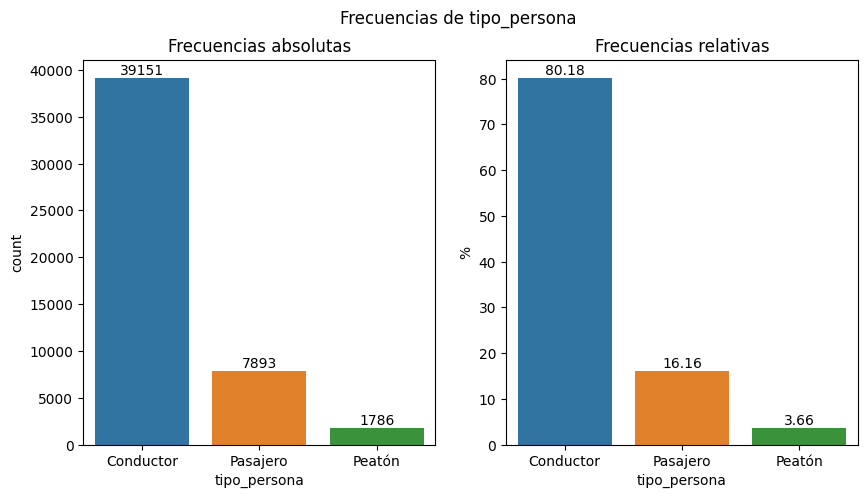

In [25]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle("Frecuencias de tipo_persona")

# Frecuencias absolutas
sns.countplot(x = "tipo_persona", data = df_2023, ax = axs[0], hue = "tipo_persona")
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = (df_2023.tipo_persona.value_counts(normalize = True) * 100).round(2)
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1584970426.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_abs = df_2023.groupby("distrito")["num_expediente"].nunique().sort_values(ascending=False)
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1584970426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top5_distritos.index, y = top5_distritos.values, palette = colores, order = top5_distritos.index, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1584970426.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

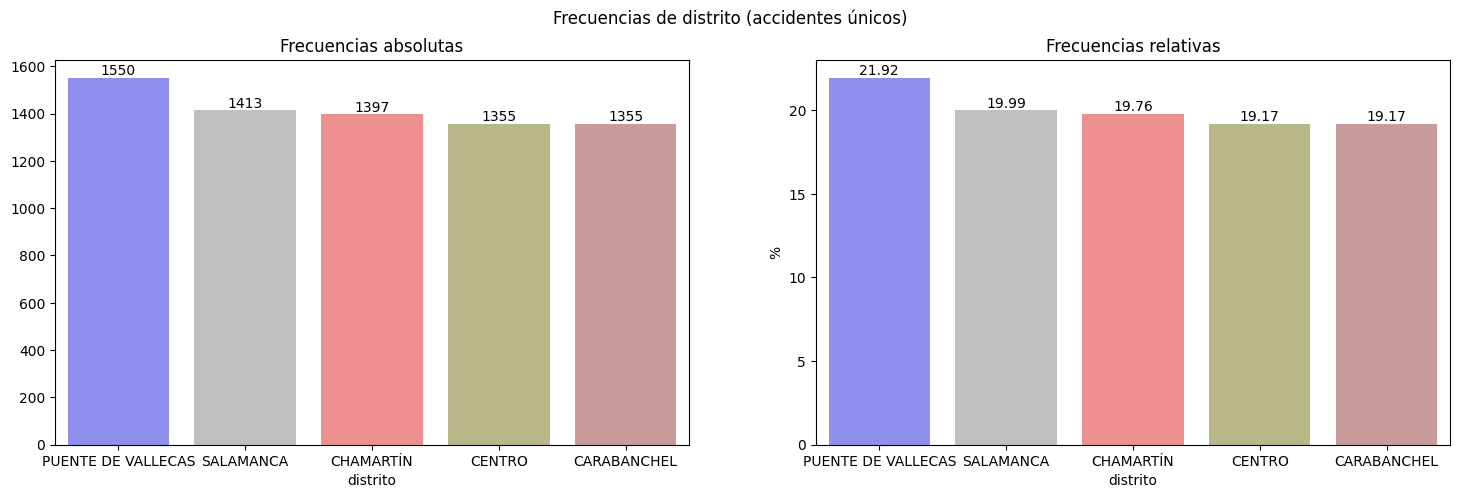

In [96]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
fig.suptitle("Frecuencias de distrito (accidentes únicos)")

frecuencias_abs = df_2023.groupby("distrito")["num_expediente"].nunique().sort_values(ascending=False)
top5_distritos = frecuencias_abs.head(5)
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.barplot(x = top5_distritos.index, y = top5_distritos.values, palette = colores, order = top5_distritos.index, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
frecuencias_rel = (top5_distritos / top5_distritos.sum() * 100).round(2)
sns.barplot(x = frecuencias_rel.index, y = frecuencias_rel.values, palette = colores, order = frecuencias_rel.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1021940953.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_abs = df_2023.groupby("tipo_accidente")["num_expediente"].nunique().sort_values(ascending=False)
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1021940953.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top5_tipo_accidente.index, y = top5_tipo_accidente.values, palette = colores, order = top5_tipo_accidente.index, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1021940953.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

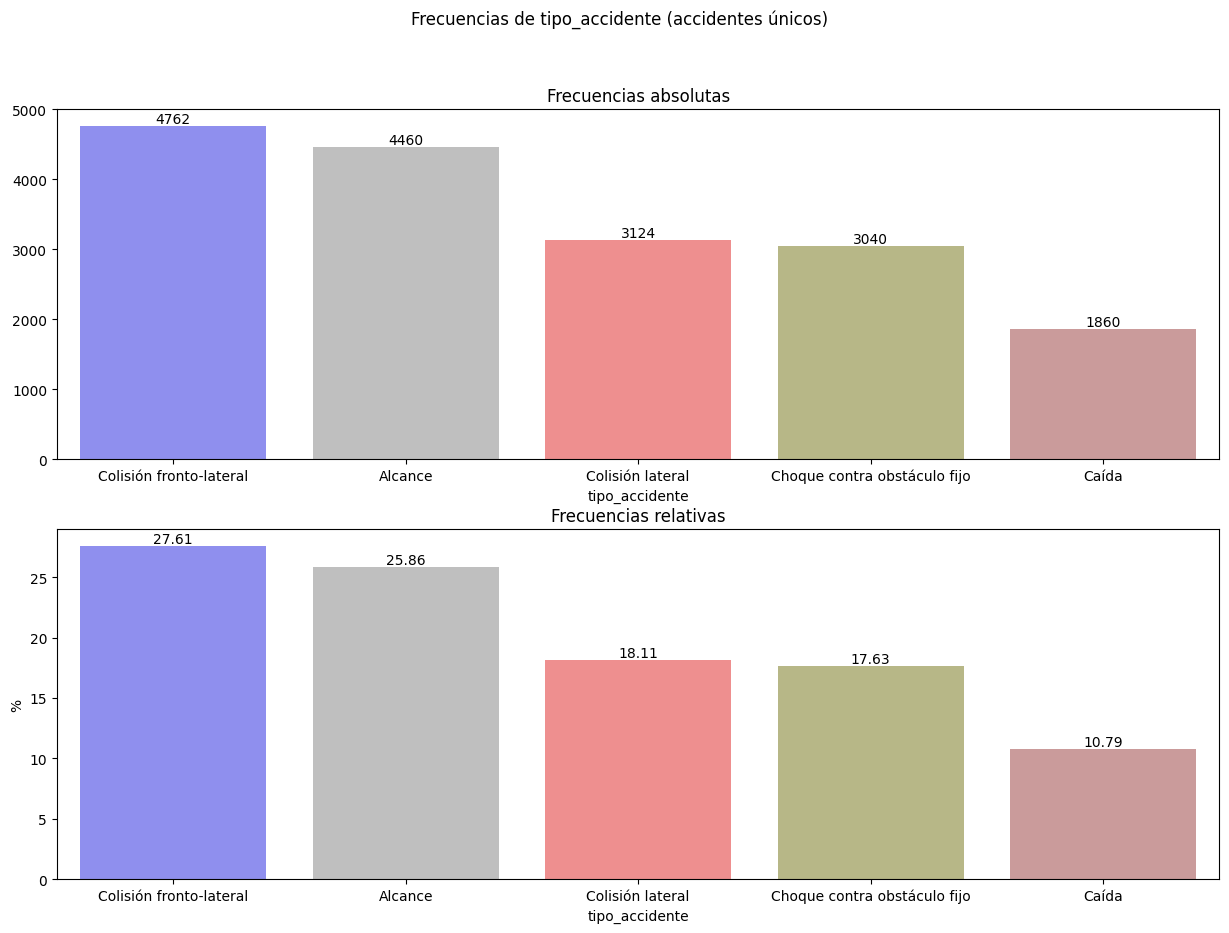

In [97]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))
fig.suptitle("Frecuencias de tipo_accidente (accidentes únicos)")

frecuencias_abs = df_2023.groupby("tipo_accidente")["num_expediente"].nunique().sort_values(ascending=False)
top5_tipo_accidente = frecuencias_abs.head(5)
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.barplot(x = top5_tipo_accidente.index, y = top5_tipo_accidente.values, palette = colores, order = top5_tipo_accidente.index, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
frecuencias_rel = (top5_tipo_accidente / top5_tipo_accidente.sum() * 100).round(2)
sns.barplot(x = frecuencias_rel.index, y = frecuencias_rel.values, palette = colores, order = frecuencias_rel.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

In [28]:
df_2023["estado_meteorológico"].unique()

['Despejado', 'No consta', 'Nublado', 'Lluvia débil', 'Se desconoce', 'LLuvia intensa', 'Granizando']
Categories (7, object): ['Despejado', 'Granizando', 'LLuvia intensa', 'Lluvia débil', 'No consta', 'Nublado', 'Se desconoce']

In [29]:
df_2023["estado_meteorológico"].value_counts()

estado_meteorológico
Despejado         37009
No consta          5703
Nublado            3269
Lluvia débil       2009
LLuvia intensa      552
Se desconoce        281
Granizando            7
Name: count, dtype: int64

C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\30809886.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_abs = df_2023.groupby("estado_meteorológico")["num_expediente"].nunique().sort_values(ascending=False)
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\30809886.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = frecuencias_abs.index, y = frecuencias_abs.values, palette = colores, order = estados, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\30809886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

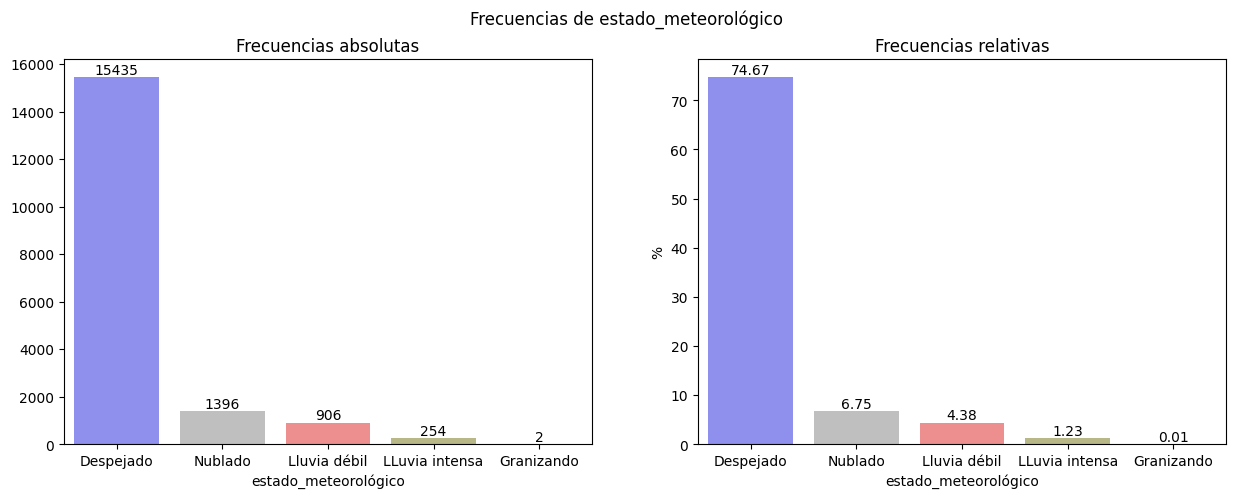

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de estado_meteorológico (accidentes únicos)")

estados = ["Despejado", "Nublado", "Lluvia débil", "LLuvia intensa", "Granizando"]
frecuencias_abs = df_2023.groupby("estado_meteorológico")["num_expediente"].nunique().sort_values(ascending=False)
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.barplot(x = frecuencias_abs.index, y = frecuencias_abs.values, palette = colores, order = estados, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
frecuencias_rel = (frecuencias_abs / frecuencias_abs.sum() * 100).round(2)
sns.barplot(x = frecuencias_rel.index, y = frecuencias_rel.values, palette = colores, order = estados, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\2074105741.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_top5_edades, x = "rango_edad", palette = colores, order = top5_edades, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\2074105741.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


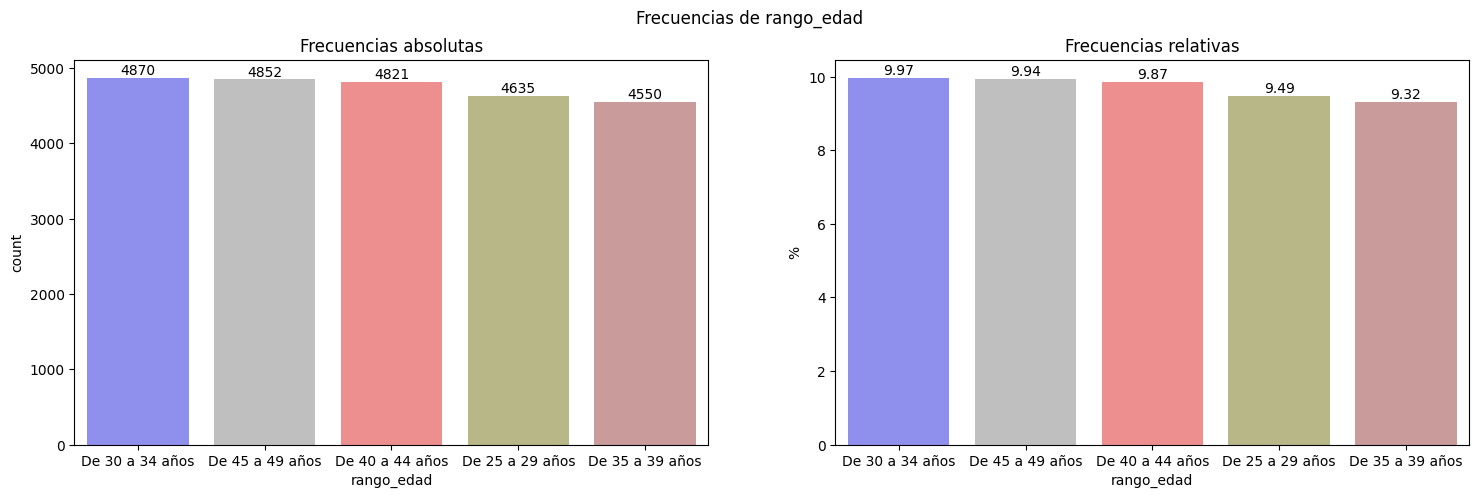

In [99]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
fig.suptitle("Frecuencias de rango_edad")

top5_edades = df_2023[df_2023["rango_edad"] != "Desconocido"]["rango_edad"].value_counts().nlargest().index
df_top5_edades = df_2023[df_2023["rango_edad"].isin(top5_edades)]
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.countplot(data = df_top5_edades, x = "rango_edad", palette = colores, order = top5_edades, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2023["rango_edad"].value_counts(normalize=True)*100).round(2).loc[top5_edades])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

In [117]:
df_2023["tipo_persona"].unique()

['Conductor', 'Pasajero', 'Peatón']
Categories (3, object): ['Conductor', 'Pasajero', 'Peatón']

In [127]:
pd.set_option('display.max_columns', None)
display(df_2023[df_2023["tipo_persona"] == "Conductor"]["rango_edad"])

0        De 55 a 59 años
5        De 45 a 49 años
6        De 65 a 69 años
8        De 50 a 54 años
9        De 50 a 54 años
              ...       
48823    De 45 a 49 años
48824    De 60 a 64 años
48827    De 45 a 49 años
48828    De 21 a 24 años
48829    De 21 a 24 años
Name: rango_edad, Length: 39151, dtype: category
Categories (18, object): ['De 10 a 14 años', 'De 15 a 17 años', 'De 18 a 20 años', 'De 21 a 24 años', ..., 'De 70 a 74 años', 'Desconocido', 'Menor de 5 años', 'Más de 74 años']

In [120]:
df_2023[df_2023["tipo_persona"] == "Conductor"]["rango_edad"].unique()

['De 55 a 59 años', 'De 45 a 49 años', 'De 65 a 69 años', 'De 50 a 54 años', 'Desconocido', ..., 'De 60 a 64 años', 'De 70 a 74 años', 'De 15 a 17 años', 'De 10 a 14 años', 'De 6 a 9 años']
Length: 17
Categories (18, object): ['De 10 a 14 años', 'De 15 a 17 años', 'De 18 a 20 años', 'De 21 a 24 años', ..., 'De 70 a 74 años', 'Desconocido', 'Menor de 5 años', 'Más de 74 años']

In [33]:
df_2023[df_2023["lesividad"] != "Se desconoce"]["lesividad"].unique()

['Sin asistencia sanitaria', 'Leve', 'Grave', 'Fallecido']
Categories (5, object): ['Leve', 'Grave', 'Fallecido', 'Sin asistencia sanitaria', 'Se desconoce']

C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\2518492387.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_lesividades, x = "lesividad", palette = colores, order = lesividades, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\2518492387.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


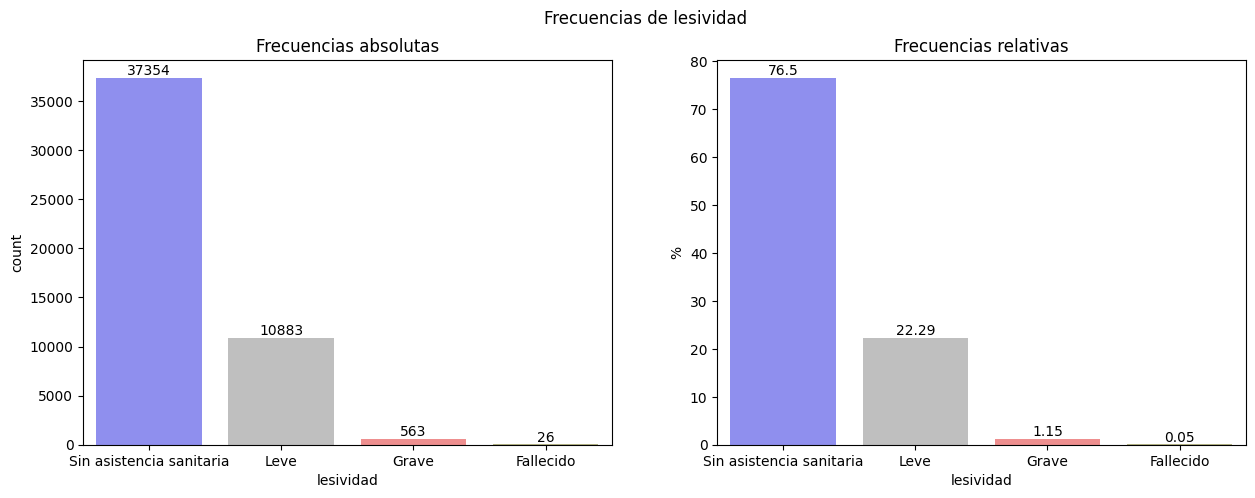

In [93]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de lesividad")

lesividades = df_2023[df_2023["lesividad"] != "Se desconoce"]["lesividad"].unique()
df_lesividades = df_2023[df_2023["lesividad"].isin(lesividades)]
colores = ["blue","gray","red","olive"]

# Frecuencias absolutas
sns.countplot(data = df_lesividades, x = "lesividad", palette = colores, order = lesividades, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2023["lesividad"].value_counts(normalize=True)*100).round(2).loc[lesividades])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_21196\3952640356.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_alcohol, x = "positiva_alcohol", palette = colores, order = alcohol, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_21196\3952640356.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


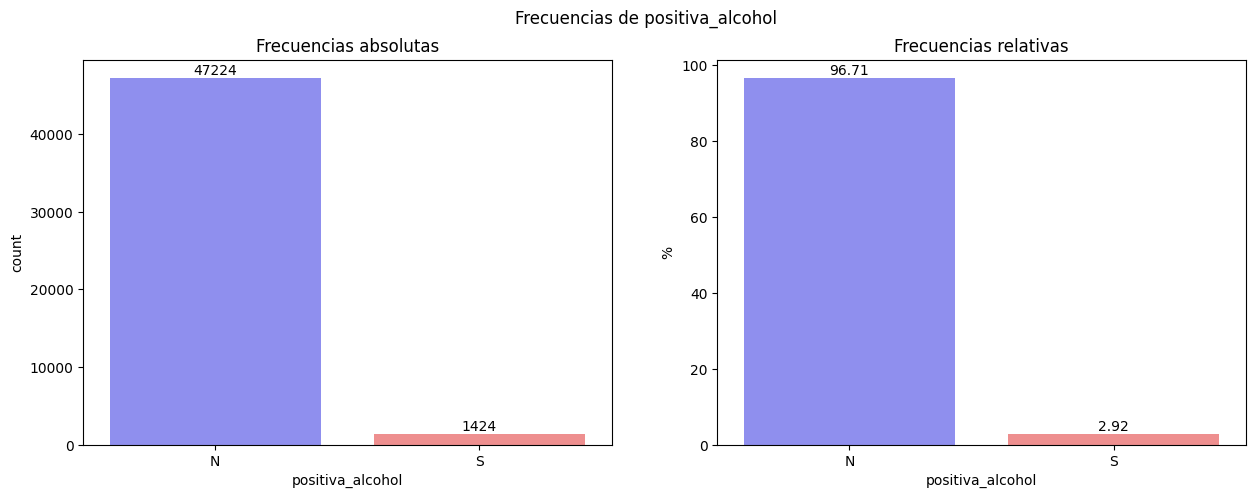

In [36]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de positiva_alcohol")

alcohol = df_2023[df_2023["positiva_alcohol"] != "No consta"]["positiva_alcohol"].unique()
df_alcohol = df_2023[df_2023["positiva_alcohol"].isin(alcohol)]
colores = ["blue", "red"]

# Frecuencias absolutas
sns.countplot(data = df_alcohol, x = "positiva_alcohol", palette = colores, order = alcohol, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2023["positiva_alcohol"].value_counts(normalize=True)*100).round(2).loc[alcohol])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_21196\3289825217.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_top5_vehiculos, x = "tipo_vehiculo", palette = colores, order = top5_vehiculos, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_21196\3289825217.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


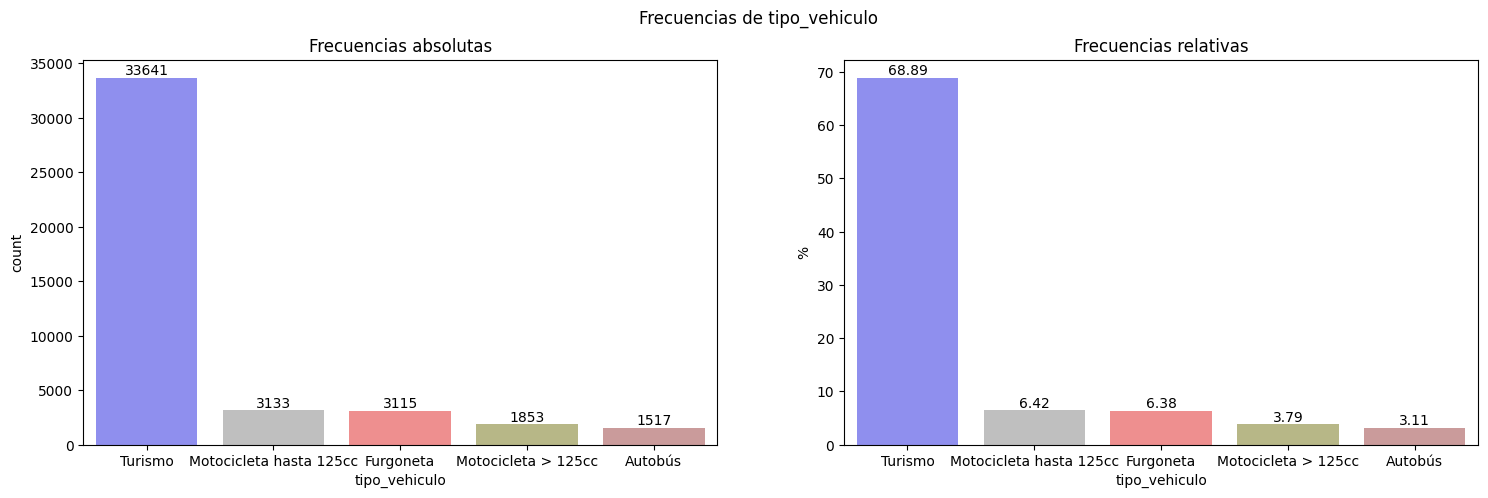

In [37]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
fig.suptitle("Frecuencias de tipo_vehiculo")

top5_vehiculos = df_2023["tipo_vehiculo"].value_counts().nlargest().index
df_top5_vehiculos = df_2023[df_2023["tipo_vehiculo"].isin(top5_vehiculos)]
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.countplot(data = df_top5_vehiculos, x = "tipo_vehiculo", palette = colores, order = top5_vehiculos, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2023["tipo_vehiculo"].value_counts(normalize=True)*100).round(2).loc[top5_vehiculos])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

In [128]:
df_2023["tipo_vehiculo"].unique()

['Todo terreno', 'Turismo', 'Motocicleta hasta 125cc', 'Furgoneta', 'No consta', ..., 'Patinete no eléctrico', 'Autobús articulado EMT', 'Tren/metro', 'Ambulancia SAMUR', 'Ciclo de motor L1e-A']
Length: 36
Categories (36, object): ['Ambulancia SAMUR', 'Autobus EMT', 'Autobús', 'Autobús articulado', ..., 'Tren/metro', 'Turismo', 'VMU eléctrico', 'Vehículo articulado']

C:\Users\lufue\AppData\Local\Temp\ipykernel_21196\3407026192.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_sexos, x = "sexo", palette = colores, order = sexos, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_21196\3407026192.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


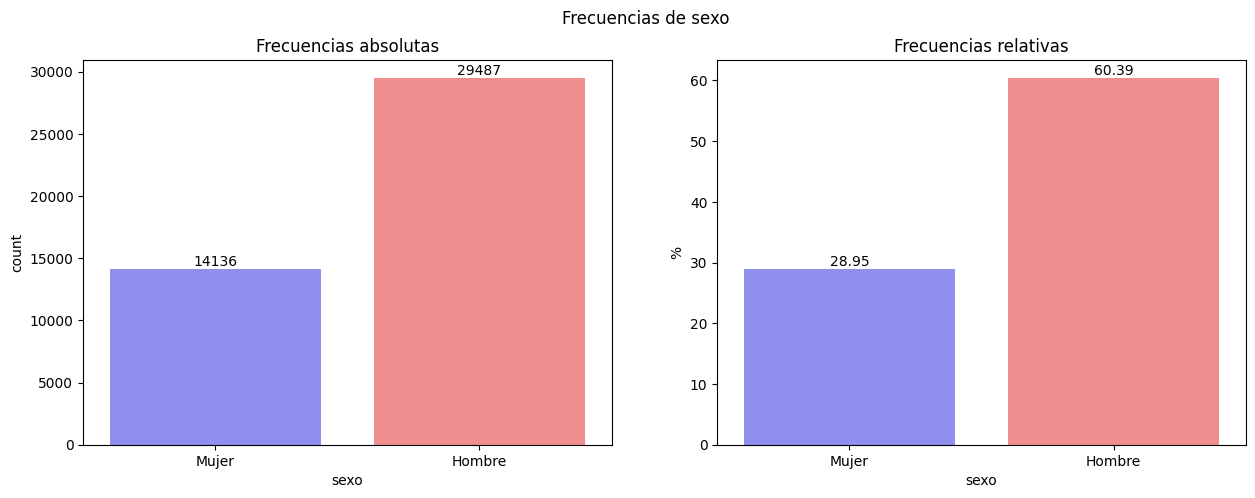

In [38]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de sexo")

sexos = df_2023[df_2023["sexo"] != "Desconocido"]["sexo"].unique()
df_sexos = df_2023[df_2023["sexo"].isin(sexos)]
colores = ["blue", "red"]

# Frecuencias absolutas
sns.countplot(data = df_sexos, x = "sexo", palette = colores, order = sexos, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2023["sexo"].value_counts(normalize=True)*100).round(2).loc[sexos])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1204207606.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_abs = df_2023.groupby("franja_horaria")["num_expediente"].nunique().sort_values(ascending=False)
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1204207606.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = frecuencias_abs.index, y = frecuencias_abs.values, palette = colores, order = franjas, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_9368\1204207606.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

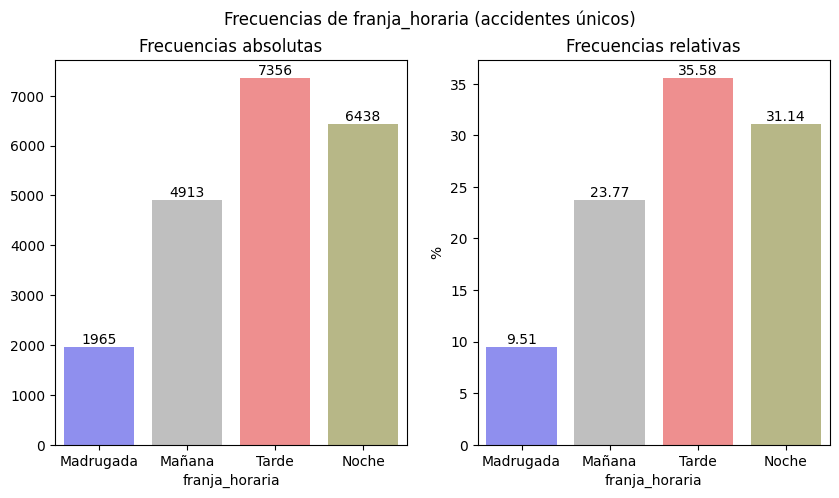

In [104]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle("Frecuencias de franja_horaria (accidentes únicos)")

franjas = df_2023["franja_horaria"].unique()
frecuencias_abs = df_2023.groupby("franja_horaria")["num_expediente"].nunique().sort_values(ascending=False)
colores = ["blue","gray","red","olive"]

# Frecuencias absolutas
sns.barplot(x = frecuencias_abs.index, y = frecuencias_abs.values, palette = colores, order = franjas, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
frecuencias_rel = (frecuencias_abs / frecuencias_abs.sum() * 100).round(2)
sns.barplot(x = frecuencias_rel.index, y = frecuencias_rel.values, palette = colores, order = franjas, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

In [105]:
df_2023["mes_categoria"] = ""
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

for i, mes in enumerate(meses):
    df_2023.loc[
        (df_2023["fecha_hora"].dt.month == i+1),
        "mes_categoria"
    ] = mes


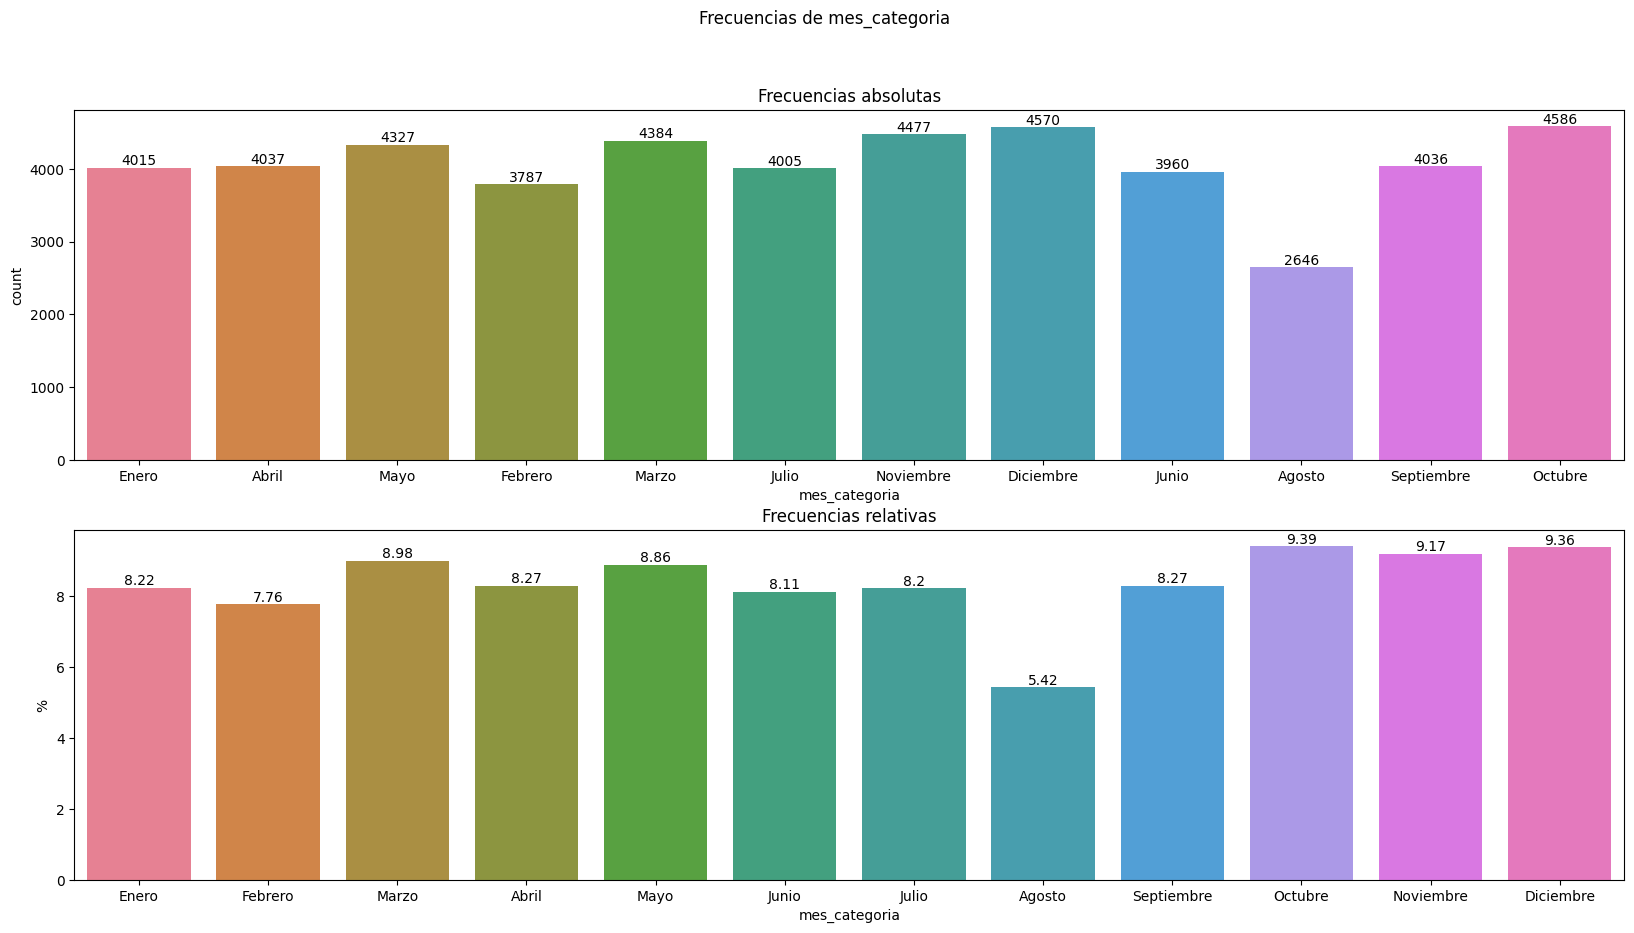

In [106]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 10))
fig.suptitle("Frecuencias de mes_categoria")

# Frecuencias absolutas
sns.countplot(x = "mes_categoria", data = df_2023, ax = axs[0], hue = "mes_categoria")
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = (df_2023.mes_categoria.value_counts(normalize = True) * 100).round(2).reindex(meses)
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

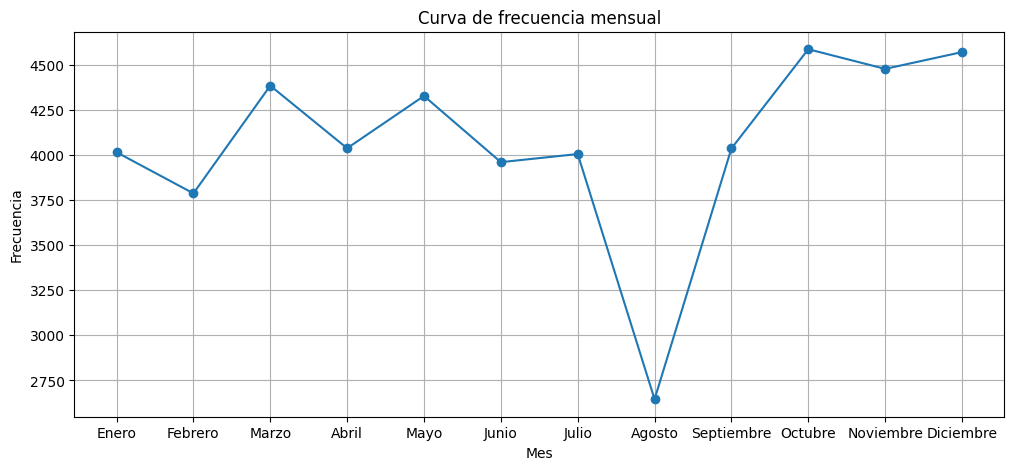

In [107]:
frecuencia_mensual = (df_2023["fecha_hora"].dt.month.value_counts().sort_index())

plt.figure(figsize=(12, 5))
plt.plot(meses, frecuencia_mensual.values, marker="o")

plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.title("Curva de frecuencia mensual")
plt.grid(True)
plt.show()


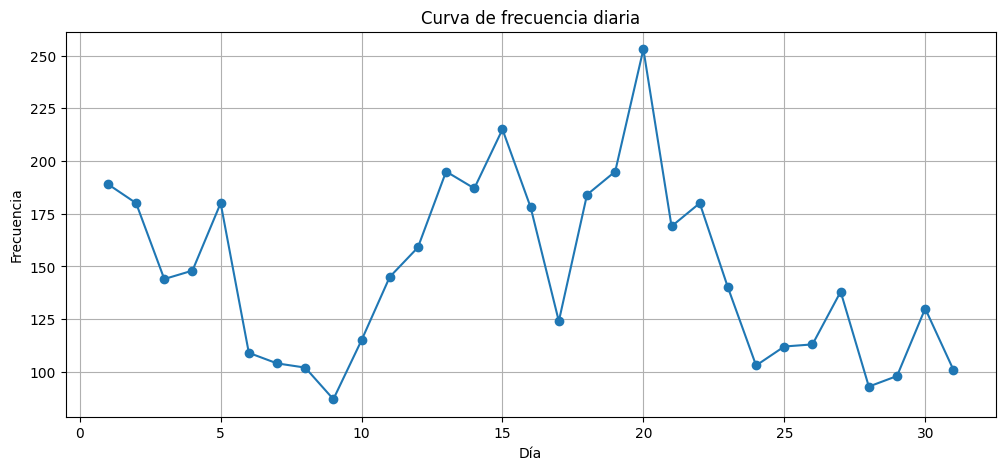

In [108]:
df_dic_23 = df_2023[df_2023["fecha_hora"].dt.month == 12]


frecuencia_diaria = (df_dic_23["fecha_hora"].dt.day.value_counts().sort_index())

plt.figure(figsize=(12, 5))
plt.plot(frecuencia_diaria.index, frecuencia_diaria.values, marker="o")

plt.xlabel("Día")
plt.ylabel("Frecuencia")
plt.title("Curva de frecuencia diaria")
plt.grid(True)
plt.show()


## Análisis bivariante

In [109]:
df_2023.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'fecha_hora', 'franja_horaria', 'mes_categoria'],
      dtype='object')

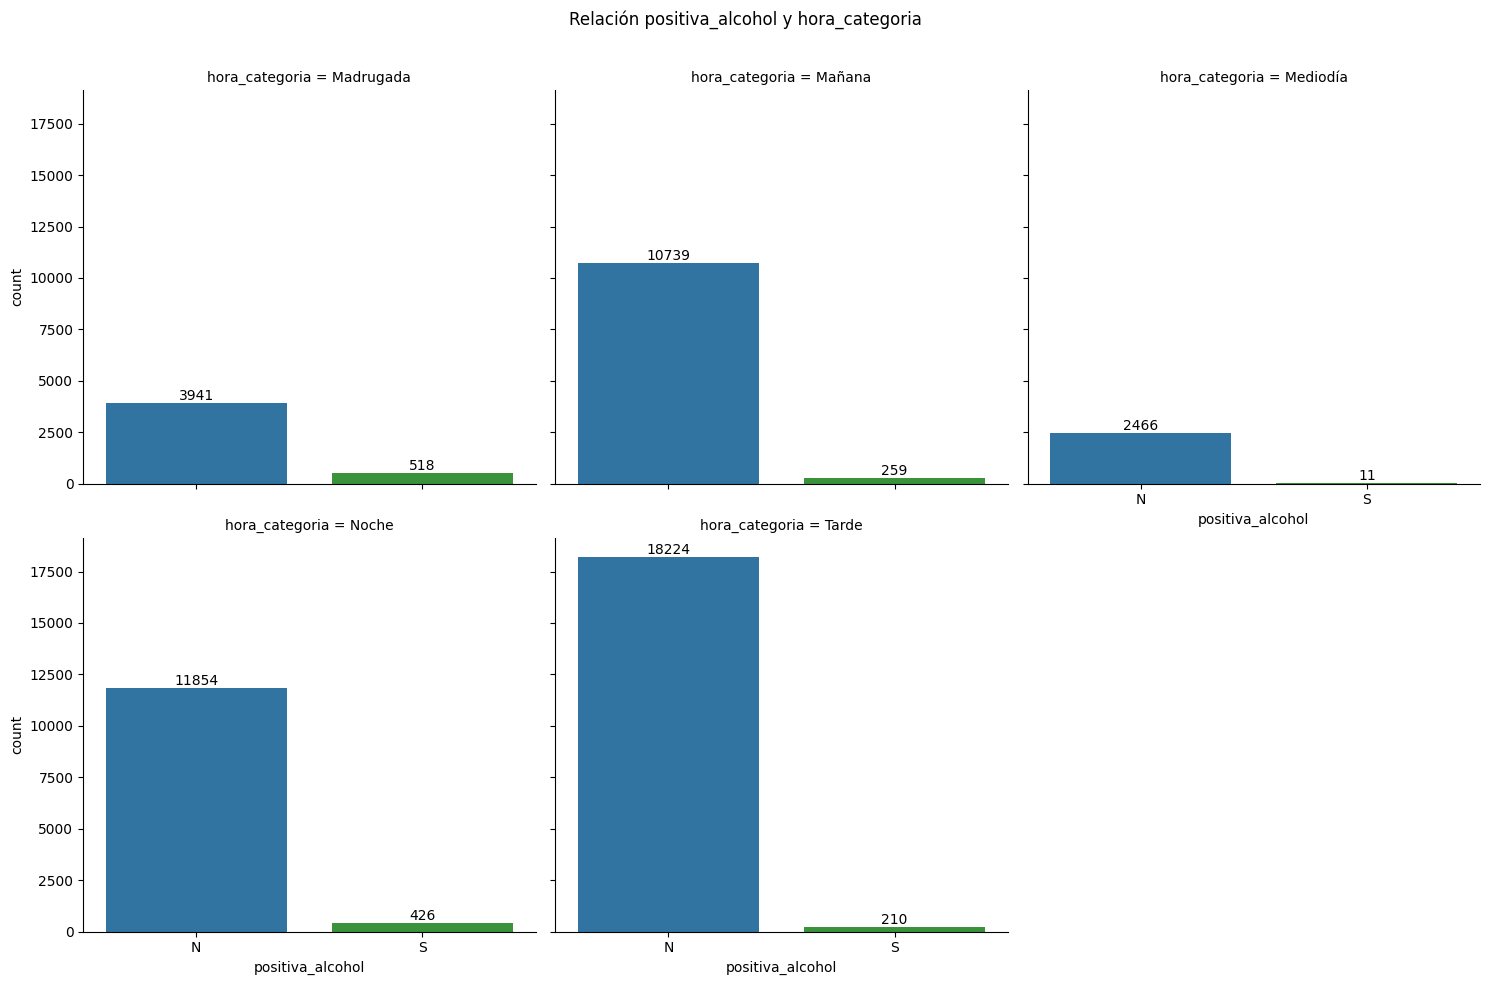

In [ ]:
alcohol = df_2023[df_2023["positiva_alcohol"] != "No consta"]["positiva_alcohol"].unique()
df_alcohol = df_2023[df_2023["positiva_alcohol"].isin(alcohol)]

fig = sns.catplot(data = df_alcohol.sort_values("franja_horaria"),
            x = "positiva_alcohol",
            col = "franja_horaria",
            kind = "count",
            orient = "v",
            hue = "positiva_alcohol",
            col_wrap = 3,
            order = alcohol)

plt.suptitle("Relación positiva_alcohol y franja_horaria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

In [94]:
cat_colx = "positiva_alcohol"
cat_coly = "hora_categoria"
frecuencias_relativas = df_2023.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] = (frecuencias_relativas["proportion"] * 100).round(2)

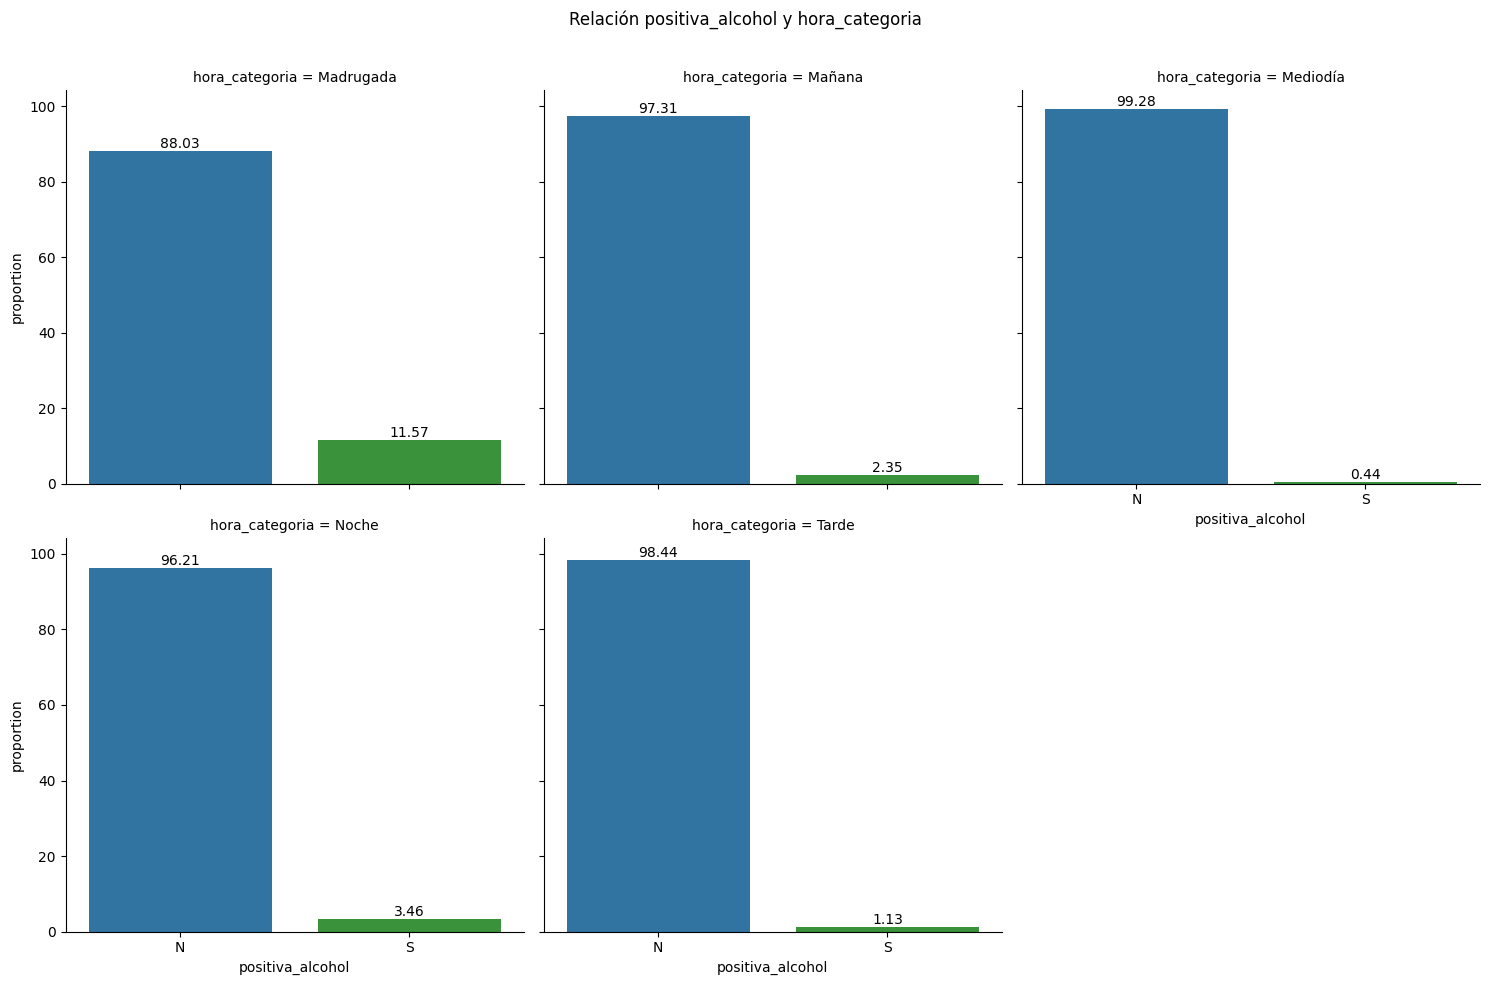

In [97]:
fig = sns.catplot(data = frecuencias_relativas,
            x = "positiva_alcohol",
            y = "proportion",
            col = "hora_categoria",
            kind = "bar",
            hue = "positiva_alcohol",
            col_wrap = 3,
            order = alcohol)

plt.suptitle("Relación positiva_alcohol y hora_categoria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

Donde más positivos de alcohol hay es de noche y sobre todo de madrugada.

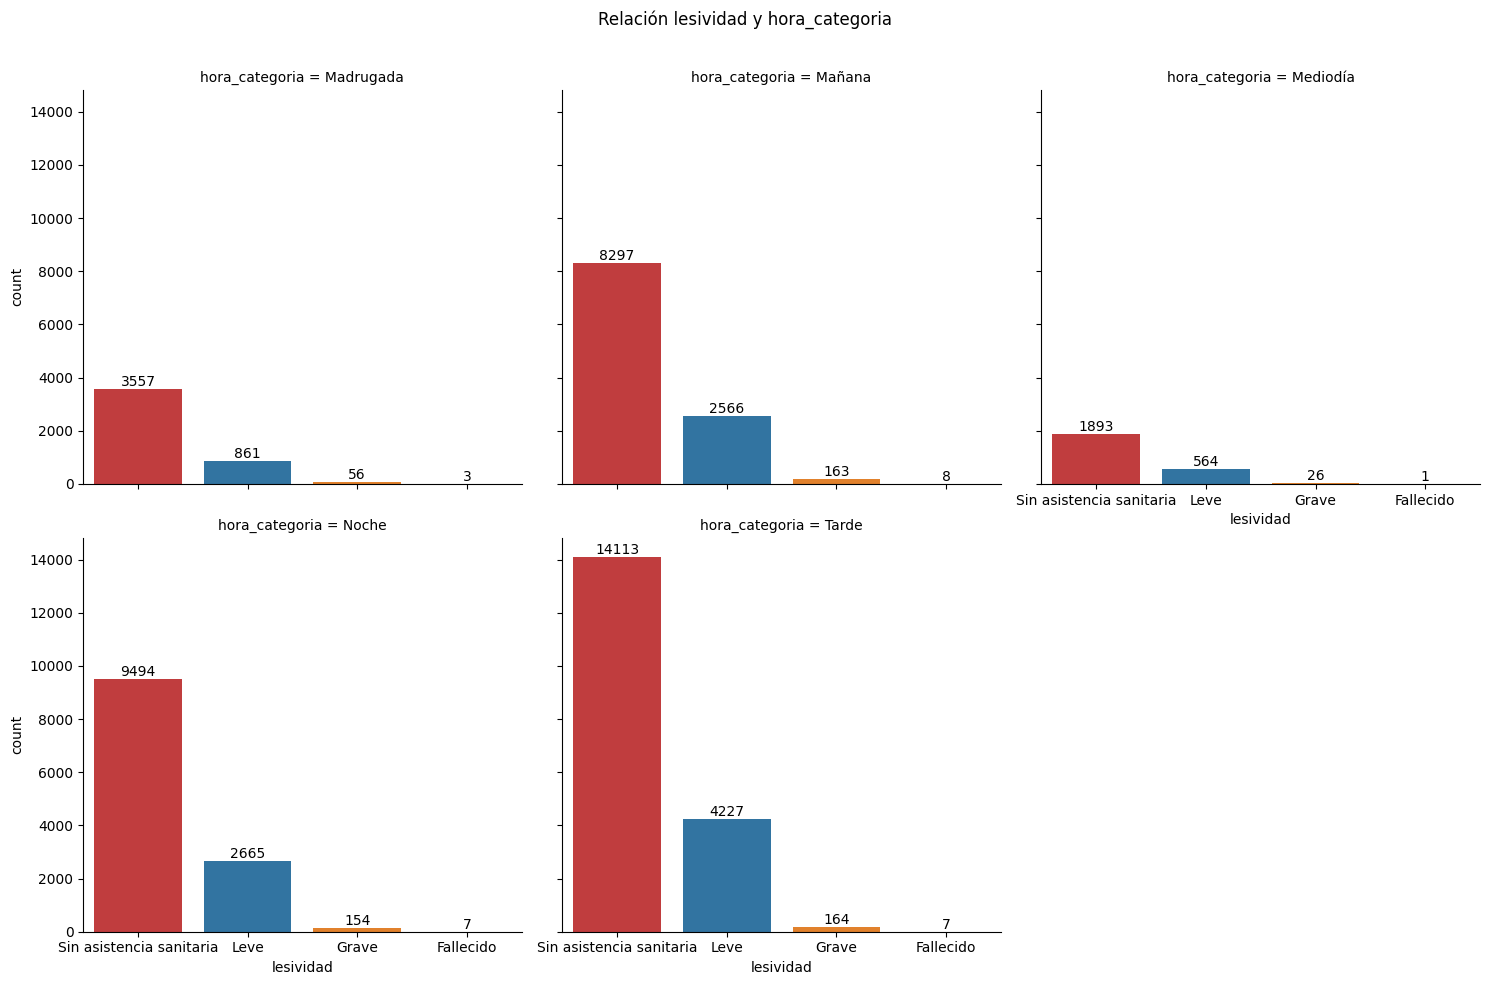

In [ ]:
lesividades = df_2023[df_2023["lesividad"] != "Se desconoce"]["lesividad"].unique()
df_lesividades = df_2023[df_2023["lesividad"].isin(lesividades)]

fig = sns.catplot(data = df_lesividades.sort_values("hora_categoria"),
            x = "lesividad",
            col = "hora_categoria",
            kind = "count",
            orient = "v",
            hue = "lesividad",
            col_wrap = 3,
            order = lesividades)

plt.suptitle("Relación lesividad y hora_categoria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

In [109]:
cat_colx = "lesividad"
cat_coly = "hora_categoria"
frecuencias_relativas = df_2023.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] = (frecuencias_relativas["proportion"] * 100).round(2)

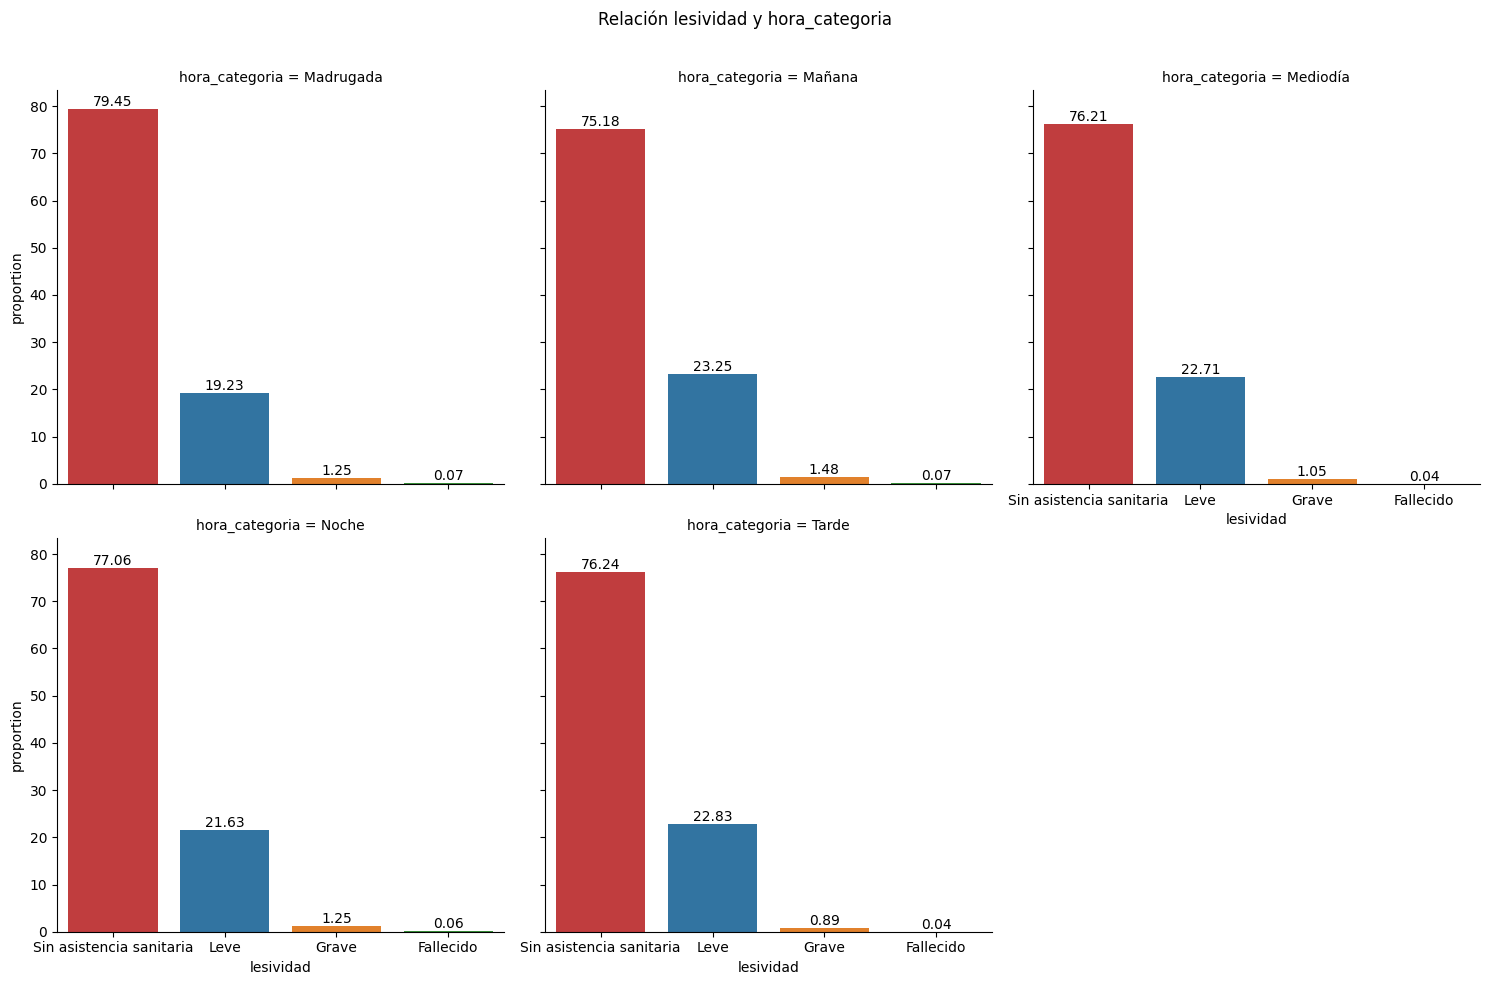

In [110]:
fig = sns.catplot(data = frecuencias_relativas,
            x = "lesividad",
            y = "proportion",
            col = "hora_categoria",
            kind = "bar",
            hue = "lesividad",
            col_wrap = 3,
            order = lesividades)

plt.suptitle("Relación lesividad y hora_categoria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

El mayor porcentaje de graves es de mañana, más que de madrugada y que de noche. De fallecidos es similar en los tres casos.

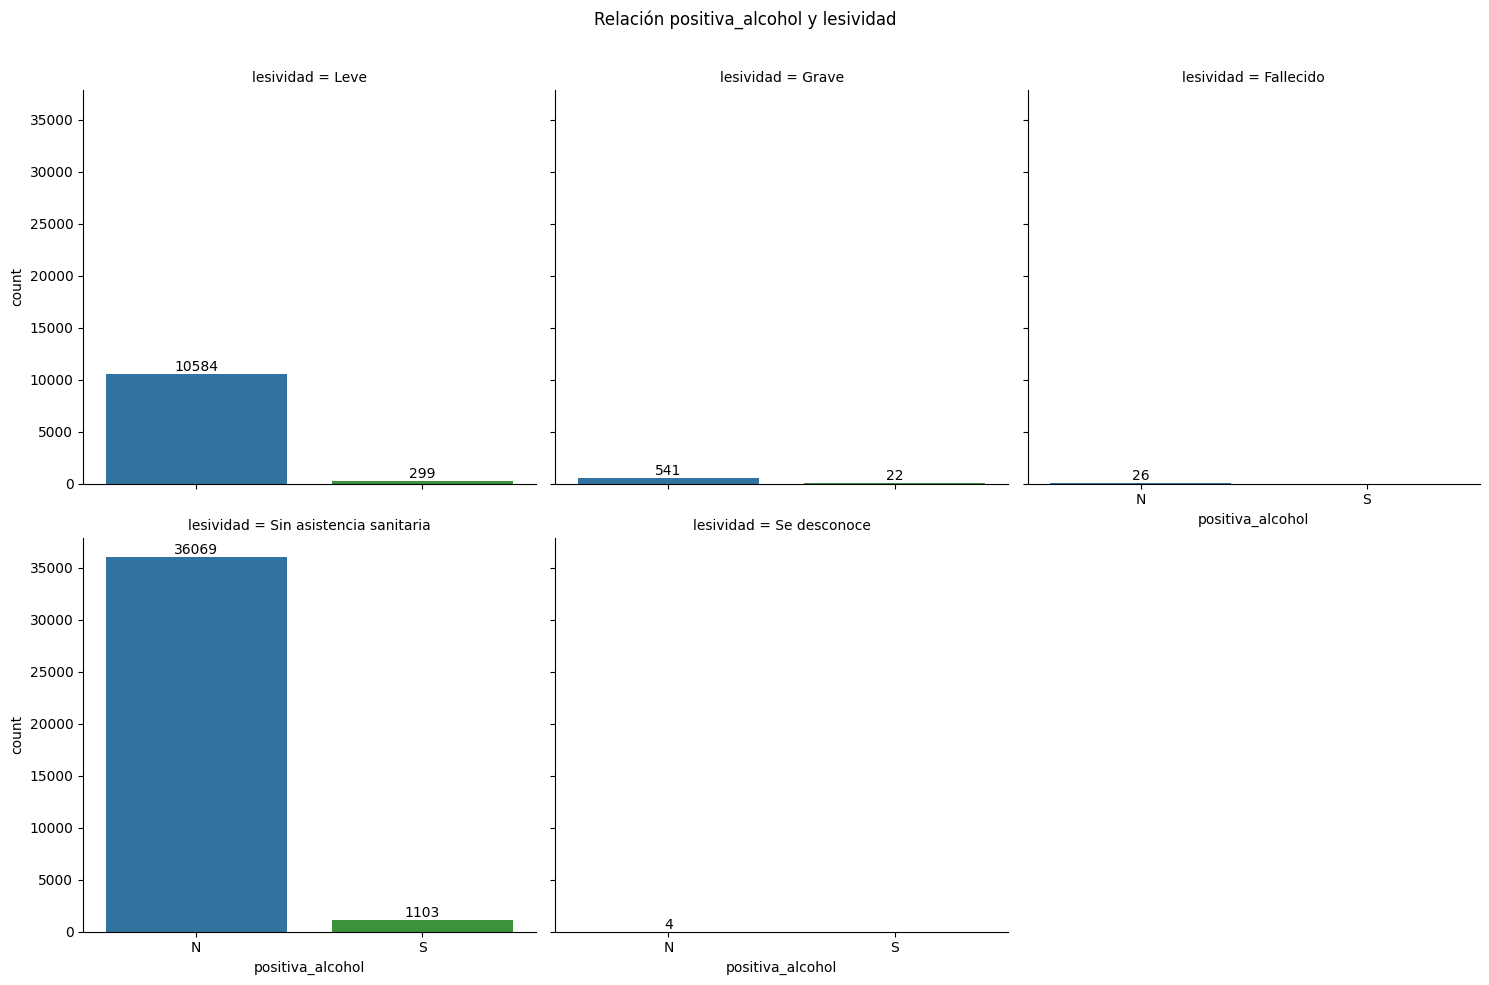

In [111]:
fig = sns.catplot(data = df_alcohol.sort_values("lesividad"),
            x = "positiva_alcohol",
            col = "lesividad",
            kind = "count",
            orient = "v",
            hue = "positiva_alcohol",
            col_wrap = 3,
            order = alcohol)

plt.suptitle("Relación positiva_alcohol y lesividad")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

In [112]:
cat_colx = "positiva_alcohol"
cat_coly = "lesividad"
frecuencias_relativas = df_2023.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] = (frecuencias_relativas["proportion"] * 100).round(2)

C:\Users\lufue\AppData\Local\Temp\ipykernel_21196\3774756904.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencias_relativas = df_2023.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)


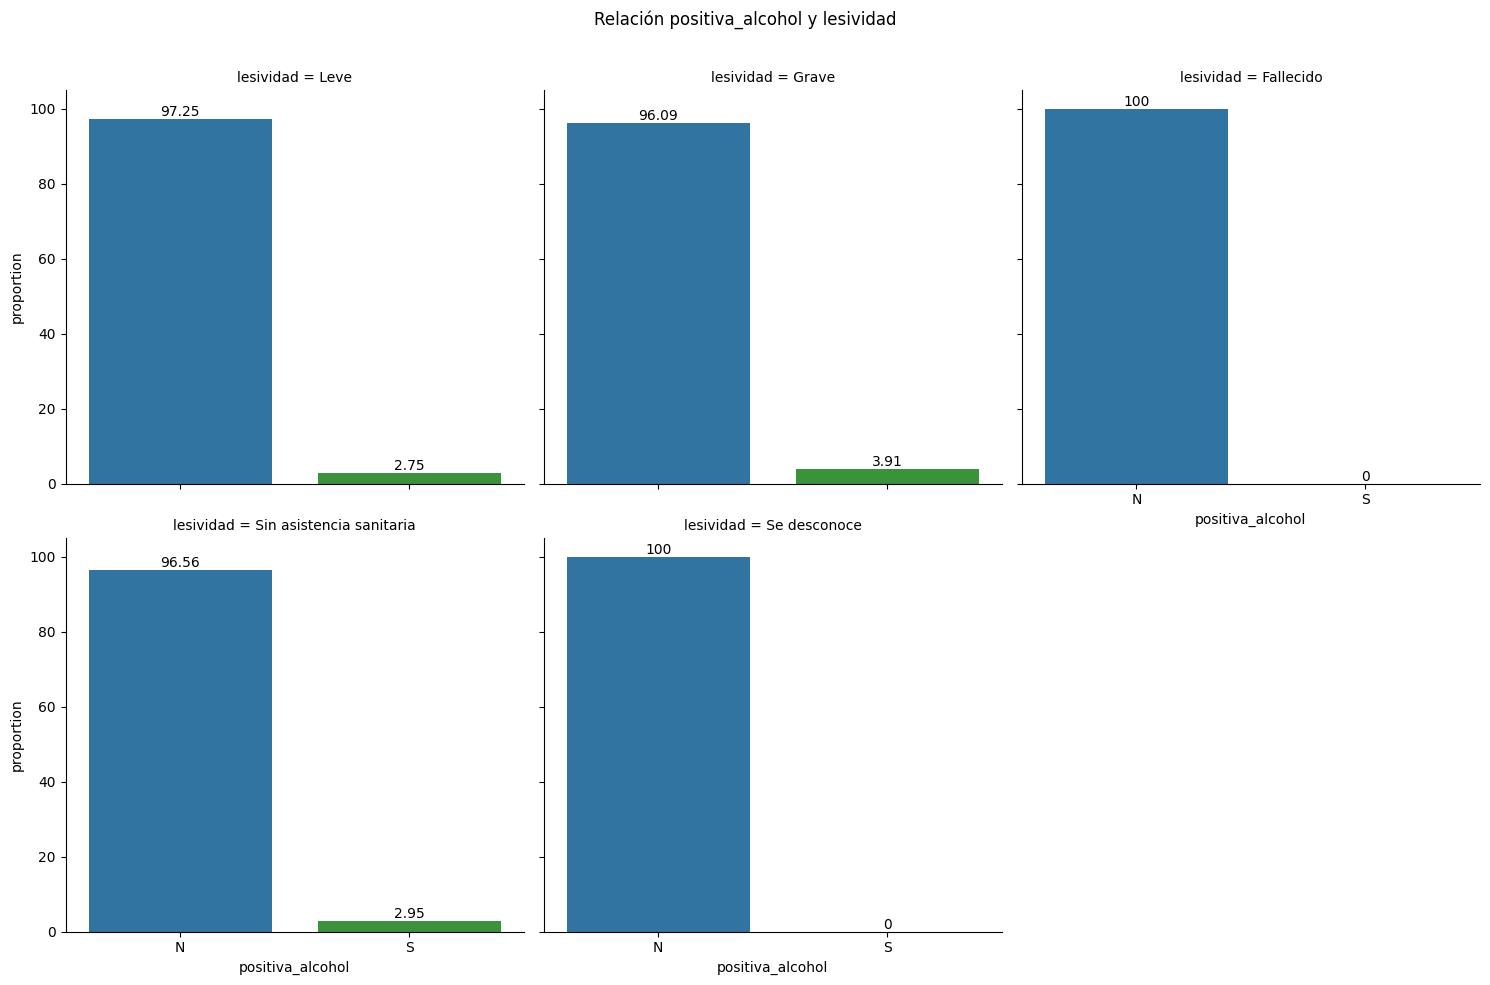

In [113]:
fig = sns.catplot(data = frecuencias_relativas,
            x = "positiva_alcohol",
            y = "proportion",
            col = "lesividad",
            kind = "bar",
            hue = "positiva_alcohol",
            col_wrap = 3,
            order = alcohol)

plt.suptitle("Relación positiva_alcohol y lesividad")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()